In [1]:
import wooldridge as woo
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import acorr_breusch_godfrey as bgtest
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import seaborn as sns
import gretltests
import matplotlib.pyplot as plt
import numpy as np
import augmentdata
import OLSAR1

plt.rcParams['figure.figsize'] = [10, 8]
#from statsmodels.tsa.ar_model import AutoReg
#mod2=AutoReg(data['infl'],lags=1,exog=data['unem']).fit()
#print(mod2.summary())

# Session 15 Slides

<Axes: >

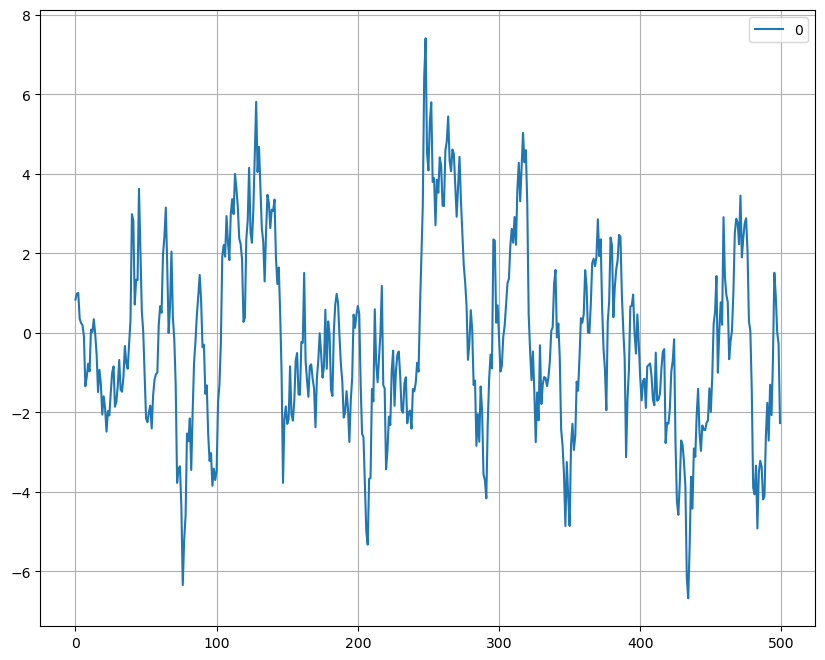

In [3]:
#To generate a AR1 series, change rho to any number between -1 and 1 and observe
rho=.9
T=500
u=np.random.normal(0,1,T)
y=[]
for i in range(T):
    if i==0:
       e=u[i]
    else:
       e=rho*e+u[i]
    y=y+[e]
pd.DataFrame(y).plot(grid=True)


In [4]:
phillips=woo.data('phillips')
woo.data('phillips',description=True)

name of dataset: phillips
no of variables: 7
no of observations: 56

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| year     | 1948 through 2003             |
| unem     | civilian unemployment rate, % |
| inf      | percentage change in CPI      |
| inf_1    | inf[_n-1]                     |
| unem_1   | unem[_n-1]                    |
| cinf     | inf - inf_1                   |
| cunem    | unem - unem_1                 |
+----------+-------------------------------+

Economic Report of the President, 2004, Tables B-42 and B-64.


In [5]:
phillips.index=phillips['year']
phillips['infl']=phillips['inf']
phillips_=phillips.loc[1948:1996,:]


In [6]:
mod1=ols('infl~unem',data=phillips_).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                   infl   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.616
Date:                Mon, 08 Apr 2024   Prob (F-statistic):              0.112
Time:                        11:48:44   Log-Likelihood:                -124.43
No. Observations:                  49   AIC:                             252.9
Df Residuals:                      47   BIC:                             256.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4236      1.719      0.828      0.4

In [7]:

[durbin_watson(mod1.resid),.5*(2-durbin_watson(mod1.resid))]

[0.802700467848626, 0.598649766075687]

In [8]:
data=augmentdata.augmentdata(mod1)
data.index=phillips_.index

<Axes: xlabel='year'>

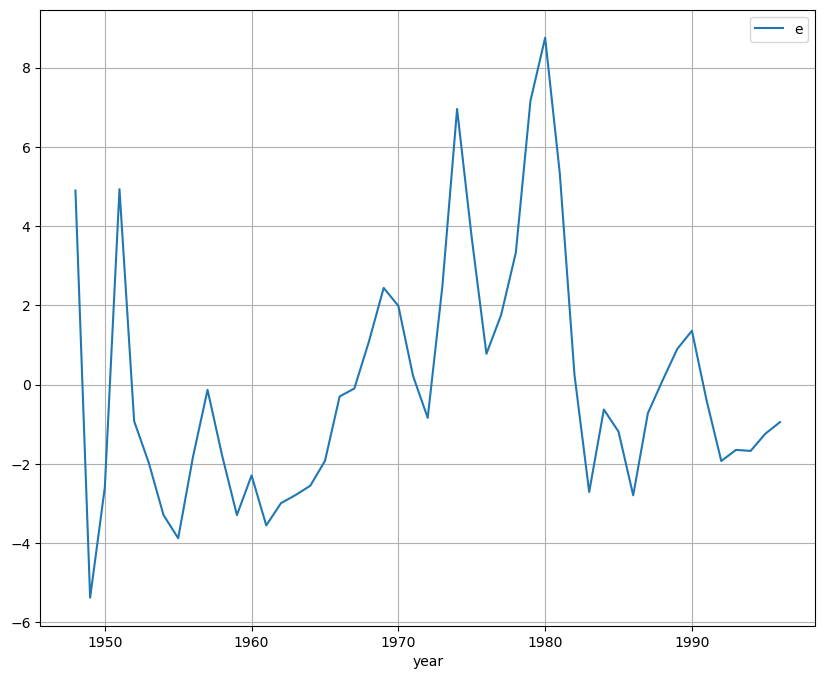

In [9]:
data.plot(y='e',grid=True)

In [10]:
#If you want to see the significance of the correlaton between the error and its lag run
print(ols('e~e_l',data=data).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     24.34
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.10e-05
Time:                        11:48:45   Log-Likelihood:                -110.88
No. Observations:                  48   AIC:                             225.8
Df Residuals:                      46   BIC:                             229.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1134      0.359     -0.316      0.7

In [11]:
bg1=bgtest(mod1,nlags=1)
print('\nbreusch godfrey:','LM',bg1[0],'LM-pval',bg1[1],': F',bg1[2],'F-pval',bg1[3])



breusch godfrey: LM 18.471606544178016 LM-pval 1.7245448662768272e-05 : F 27.832905857355126 F-pval 3.4661074502151606e-06


In [12]:
#The following repeats the regression used for the BG test
print(gretltests.BGtest(mod1).summary())

Note that the BG test here replaces the first missing lagged error with zero

BG test 27.832905857355104 P-value 3.466107450215185e-06
                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     13.92
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.88e-05
Time:                        11:48:45   Log-Likelihood:                -112.83
No. Observations:                  49   AIC:                             231.7
Df Residuals:                      46   BIC:                             237.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

C:\Users\aes05kgb\Kelvin\Econometrics\APME71\gretltests.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  F=model1.tvalues[len(model1.tvalues)-1]**2
C:\Users\aes05kgb\Kelvin\Econometrics\APME71\gretltests.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('\nBG test',F, 'P-value', model1.pvalues[len(model1.tvalues)-1])


In [13]:
#Statsmodels does not have the Chochrane orcutt, so the code is in the OLSAR1 file
md=OLSAR1.OLSAR1(mod1)
print(md.summary())

Rho =  0.7160183049674586
Rho =  0.7611395288243896
Rho =  0.7714503609586415
Rho =  0.7735393145842964
Rho =  0.773951030005779
Rho =  0.7740317260838191
Rho =  0.7740475251973714
Rho =  0.7740506177702088
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.334
Date:                Mon, 08 Apr 2024   Prob (F-statistic):             0.0430
Time:                        11:48:45   Log-Likelihood:                -106.60
No. Observations:                  48   AIC:                             217.2
Df Residuals:                      46   BIC:                             220.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
   

# Session 15 Interactive

In [14]:
intdef=woo.data('INTDEF')
woo.data('INTDEF',description=True)
#Python does not like inf nor def which are reserved words
intdef['infl']=intdef['inf']
intdef['Def']=intdef['def']
intdef.index=intdef['year']

name of dataset: intdef
no of variables: 13
no of observations: 56

+----------+----------------------------------+
| variable | label                            |
+----------+----------------------------------+
| year     | 1948 to 2003                     |
| i3       | 3 month T-bill rate              |
| inf      | CPI inflation rate               |
| rec      | federal receipts, % GDP          |
| out      | federal outlays, % GDP           |
| def      | out - rec                        |
| i3_1     | i3[_n-1]                         |
| inf_1    | inf[_n-1]                        |
| def_1    | def[_n-1]                        |
| ci3      | i3 - i3_1                        |
| cinf     | inf - inf_1                      |
| cdef     | def - def_1                      |
| y77      | =1 if year >= 1977; change in FY |
+----------+----------------------------------+

Economic Report of the President, 2004, Tables B-64, B-73, and B-79.


In [15]:
#intdef

In [16]:
mod2=ols('i3~infl+Def',data=intdef).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     40.09
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           2.48e-11
Time:                        11:48:46   Log-Likelihood:                -112.16
No. Observations:                  56   AIC:                             230.3
Df Residuals:                      53   BIC:                             236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7333      0.432      4.012      0.0

<Axes: xlabel='year'>

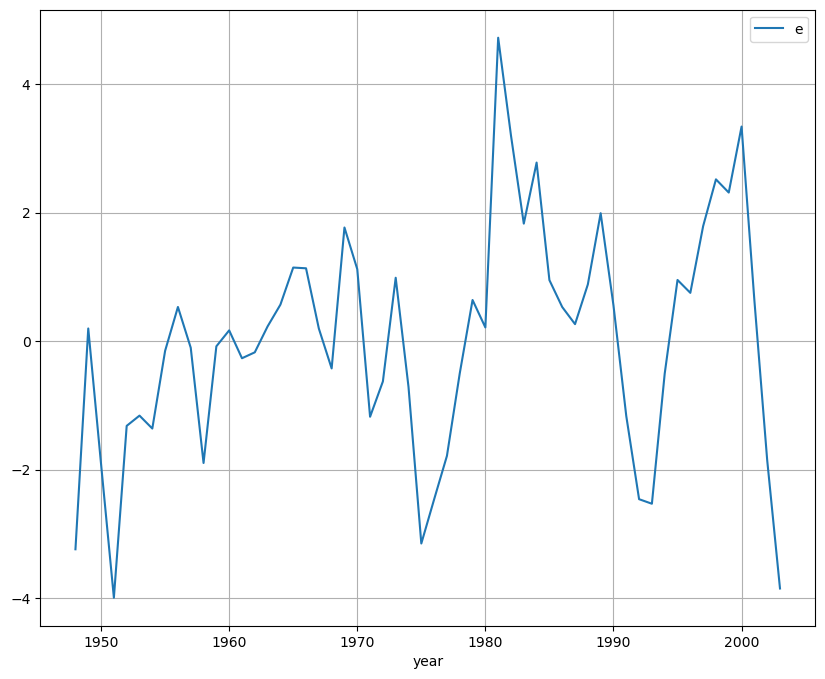

In [17]:
dat2=augmentdata.augmentdata(mod2)
dat2.index=intdef.index
dat2.plot(y='e',grid=True)

In [18]:
[durbin_watson(mod2.resid),.5*(2-durbin_watson(mod2.resid))]

[0.7161527071516055, 0.6419236464241973]

In [19]:
bg2=bgtest(mod2,nlags=1)
print('\nbreusch godfrey:','LM',bg2[0],'LM-pval',bg2[1],': F',bg2[2],'F-pval',bg2[3])



breusch godfrey: LM 20.153811591426827 LM-pval 7.145771050579037e-06 : F 29.23597317542274 F-pval 1.633340836797645e-06


In [20]:
#The following repeats the regression used for the BG test
print(gretltests.BGtest(mod2).summary())

Note that the BG test here replaces the first missing lagged error with zero

BG test 29.235973175422735 P-value 1.6333408367976458e-06
                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     9.745
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           3.32e-05
Time:                        11:48:46   Log-Likelihood:                -99.671
No. Observations:                  56   AIC:                             207.3
Df Residuals:                      52   BIC:                             215.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

C:\Users\aes05kgb\Kelvin\Econometrics\APME71\gretltests.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  F=model1.tvalues[len(model1.tvalues)-1]**2
C:\Users\aes05kgb\Kelvin\Econometrics\APME71\gretltests.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('\nBG test',F, 'P-value', model1.pvalues[len(model1.tvalues)-1])


In [21]:
mod3=OLSAR1.OLSAR1(mod2)
print(mod3.summary())

Rho =  0.7750077193943042
Rho =  0.8428385089464937
Rho =  0.861072325434938
Rho =  0.8646662844262281
Rho =  0.8653188402975379
Rho =  0.8654354933019988
Rho =  0.865456288283245
Rho =  0.8654599934202891
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     6.443
Date:                Mon, 08 Apr 2024   Prob (F-statistic):            0.00316
Time:                        11:48:46   Log-Likelihood:                -87.078
No. Observations:                  55   AIC:                             180.2
Df Residuals:                      52   BIC:                             186.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
    

<Axes: title={'center': 'CC errors'}, xlabel='year'>

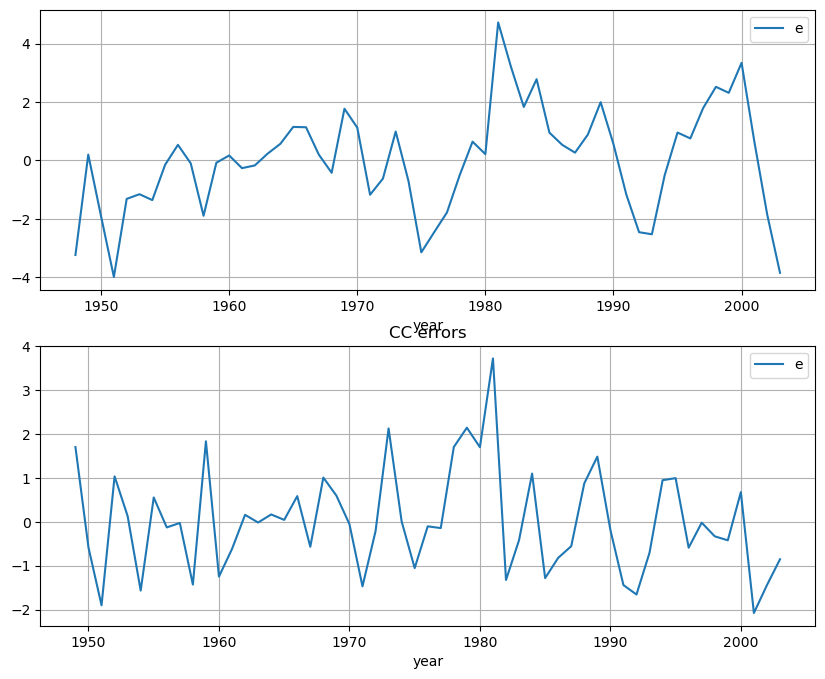

In [22]:
fig,ax=plt.subplots(2)
dat3=augmentdata.augmentdata(mod3)
dat3.index=dat2.index[1:]
dat2.plot(y='e',grid=True,ax=ax[0])
dat3.plot(y='e',grid=True,ax=ax[1],title='CC errors')


In [23]:
#Python does not have the other options for AR serial correlaton though they could be created from Scratch. I will not create the others as they generally give very similar results
